In [1]:
import geopandas as gpd
import xarray as xr
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from shapely.geometry import Point
import rasterio
from rasterio.transform import from_origin
from rasterio.enums import Resampling
from rasterio.features import geometry_mask

In [2]:
for csv in os.listdir('csvs'):
    if csv.endswith('.csv'):
        df = pd.read_csv(f"csvs/{csv}")
        # Create a GeoDataFrame with the longitude and latitude as geometry
        geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

        gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
        import rasterio
        from rasterio.features import geometry_mask
        from rasterio.transform import from_bounds
        from rasterio.enums import Resampling

        # Extract hsi_mean column from gdf
        hsi_mean_values = gdf['hsi_mean'].values

        # Calculate width and height based on the resolution
        xmin, ymin, xmax, ymax = gdf.total_bounds
        res = 0.1  # Change this to your desired resolution
        width = int(np.ceil((xmax - xmin) / res))
        height = int(np.ceil((ymax - ymin) / res))

        # Round up the width and height to ensure it's divisible by the resolution
        width = int(np.ceil(width / res) * res)
        height = int(np.ceil(height / res) * res)

        # Create a transform for the raster
        transform = from_bounds(xmin, ymin, xmax, ymax, width, height)

        # Create a raster grid
        with rasterio.open(
                f'tifs/{csv}.tif',
                'w',
                driver='GTiff',
                height=height,
                width=width,
                count=1,
                dtype=rasterio.float64,
                crs='EPSG:4326',
                transform=transform
        ) as dst:
            # Rasterize hsi_mean values onto the grid
            hsi_rasterized = np.zeros((height, width), dtype=np.float64)
            rasterio.features.rasterize(
                ((geom, val) for geom, val in zip(gdf.geometry, hsi_mean_values)),
                out=hsi_rasterized,
                transform=transform,
                fill=np.nan
            )

            # Write the rasterized data to the file
            dst.write(hsi_rasterized, 1)

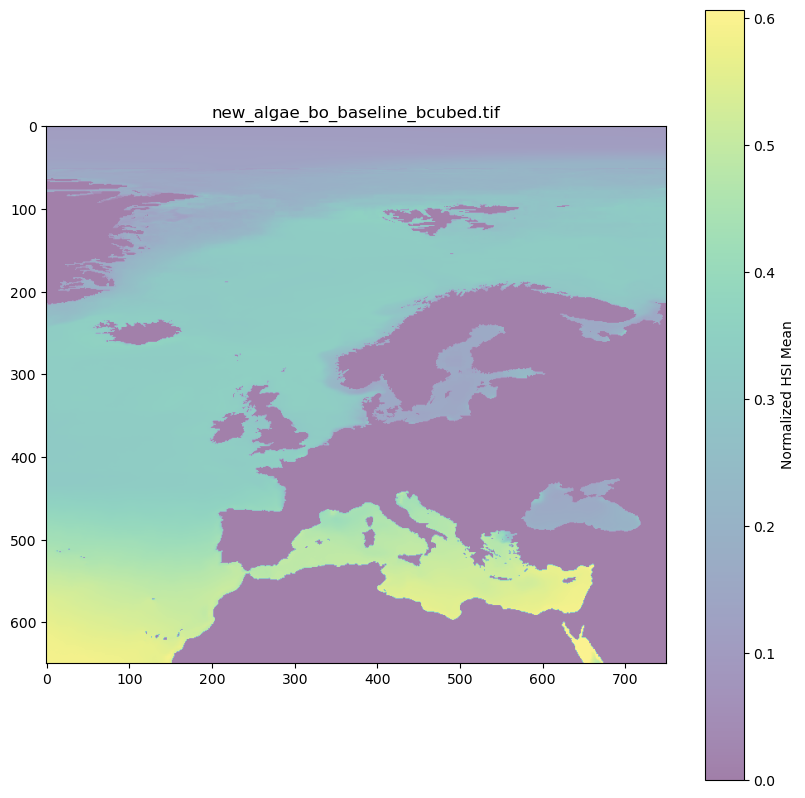

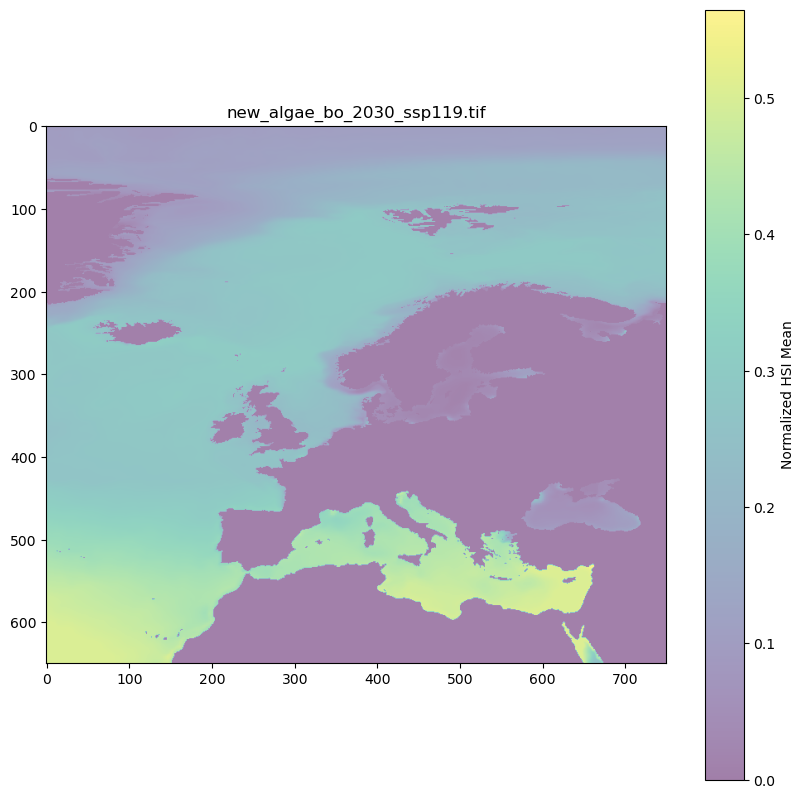

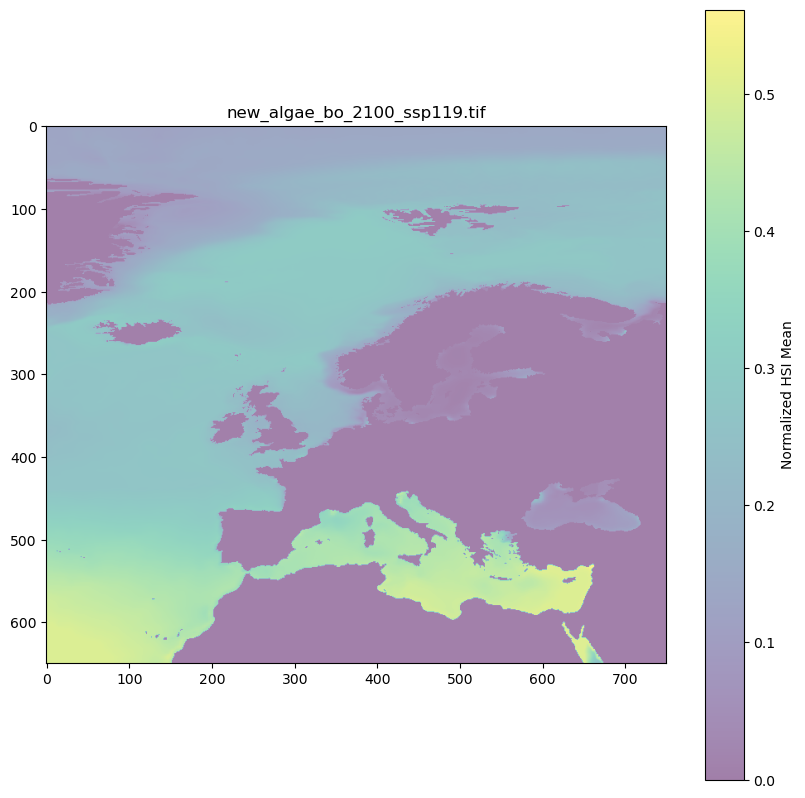

In [3]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import geopandas as gpd
import numpy as np

tifsSSP119 = ['tifs/new_algae_bo_baseline_bcubed.tif', 'tifs/new_algae_bo_2030_ssp119.tif', 'tifs/new_algae_bo_2100_ssp119.tif']
for tif in tifsSSP119:
    if tif.endswith('tif'):
        # Open the raster grid
        with rasterio.open(tif) as src:
            # Get the rasterized data
            data = src.read(1)
            
            # Plot the raster grid
            plt.figure(figsize=(10, 10))
            
            # Plot the rasterized values with transparency based on the values
            plt.imshow(data, cmap='viridis', alpha=0.5)
            plt.title(os.path.basename(tif))
            plt.colorbar(label='Normalized HSI Mean')

            # Display the plot
            plt.show()
       

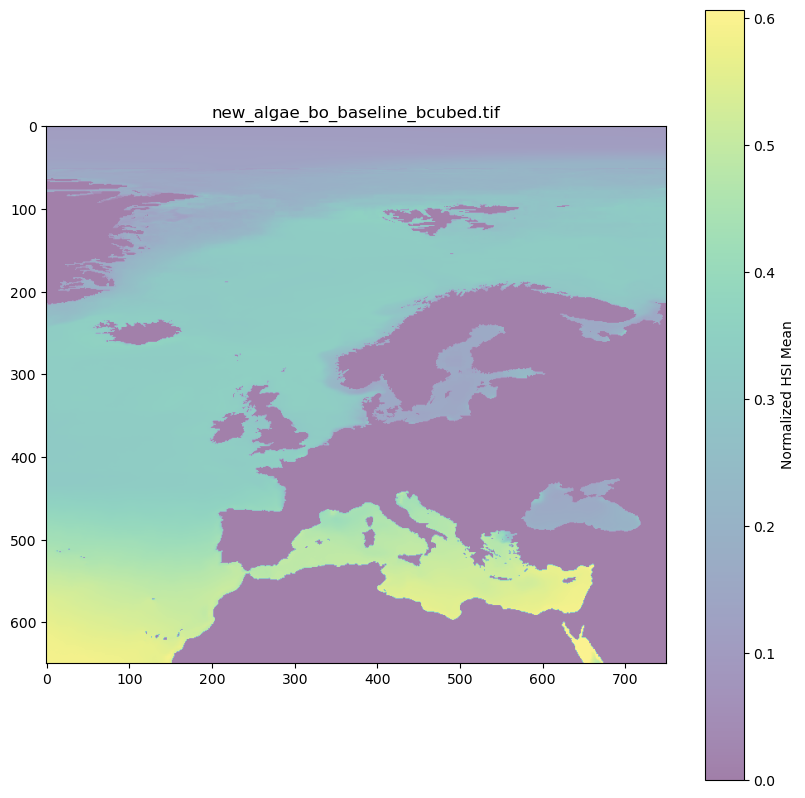

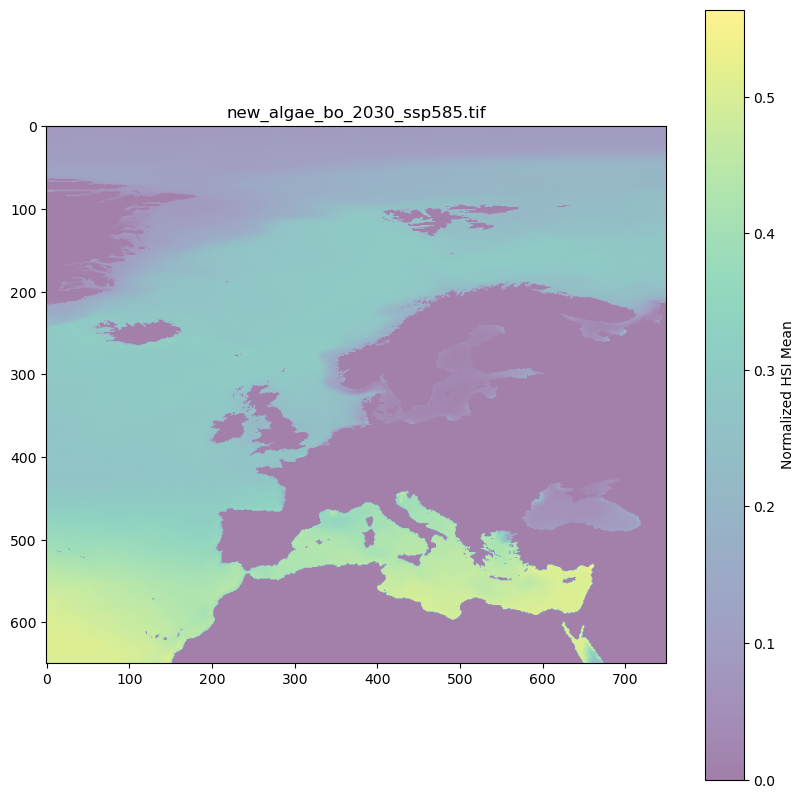

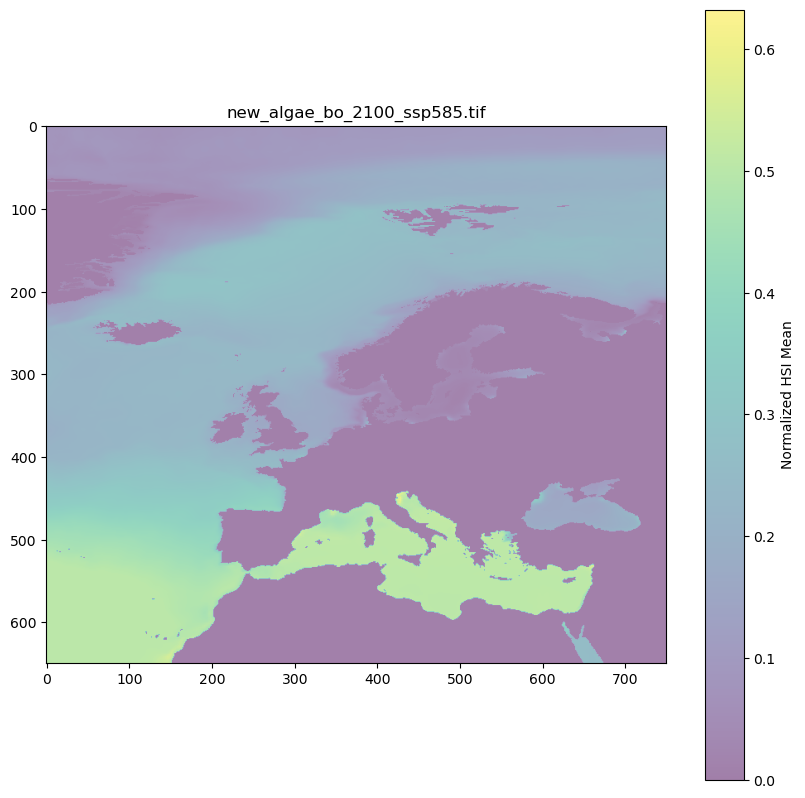

In [4]:
tifsSSP585 = ['tifs/new_algae_bo_baseline_bcubed.tif', 'tifs/new_algae_bo_2030_ssp585.tif', 'tifs/new_algae_bo_2100_ssp585.tif']

for tif in tifsSSP585:
    if tif.endswith('tif'):
        # Open the raster grid
        with rasterio.open(tif) as src:
            # Get the rasterized data
            data = src.read(1)
            
            # Plot the raster grid
            plt.figure(figsize=(10, 10))
            
            # Plot the rasterized values with transparency based on the values
            plt.imshow(data, cmap='viridis', alpha=0.5)
            plt.title(os.path.basename(tif))
            plt.colorbar(label='Normalized HSI Mean')

            # Display the plot
            plt.show()

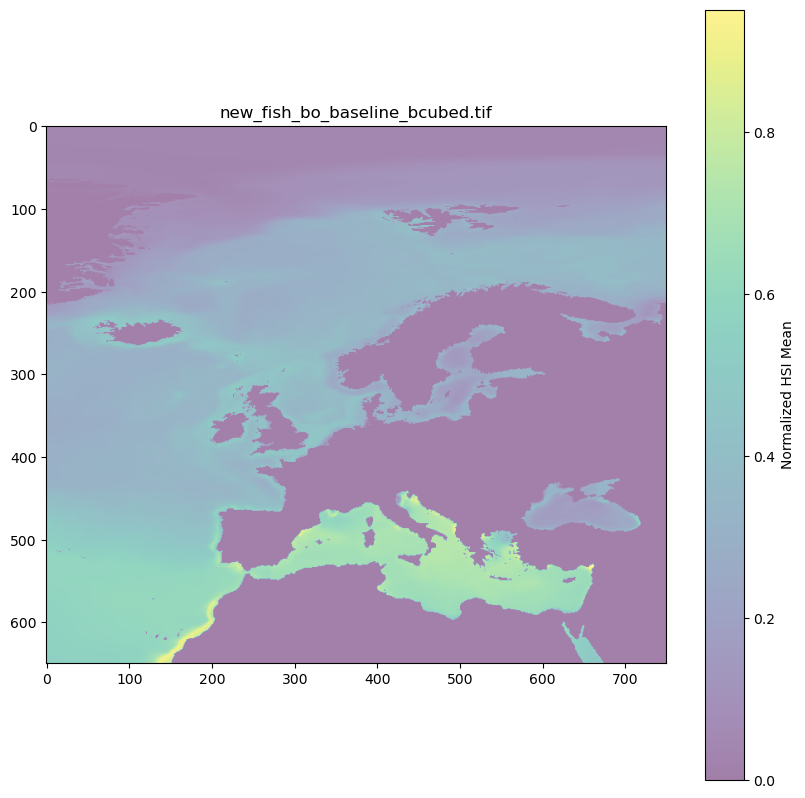

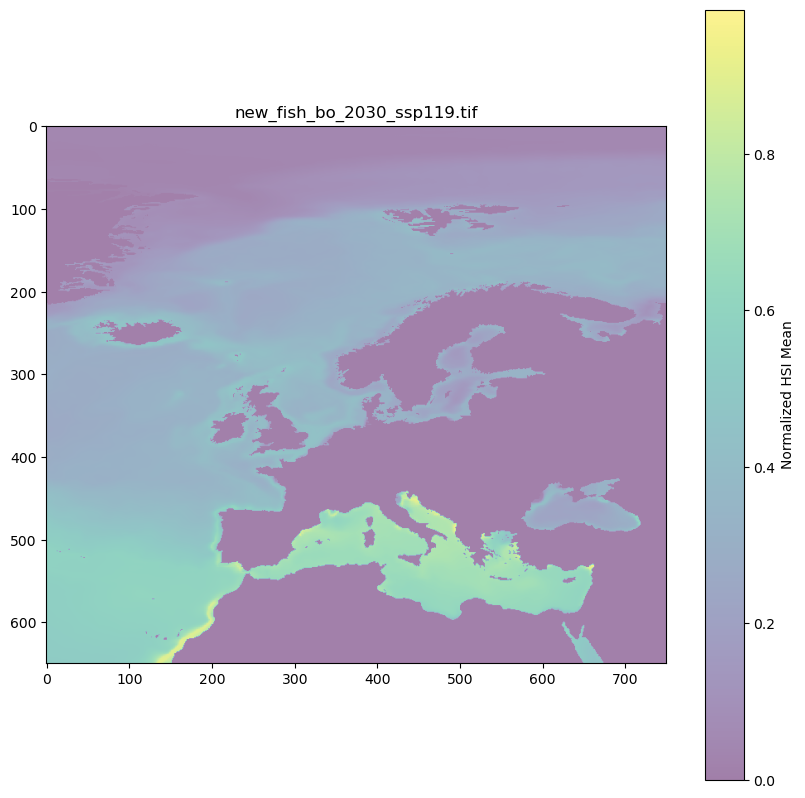

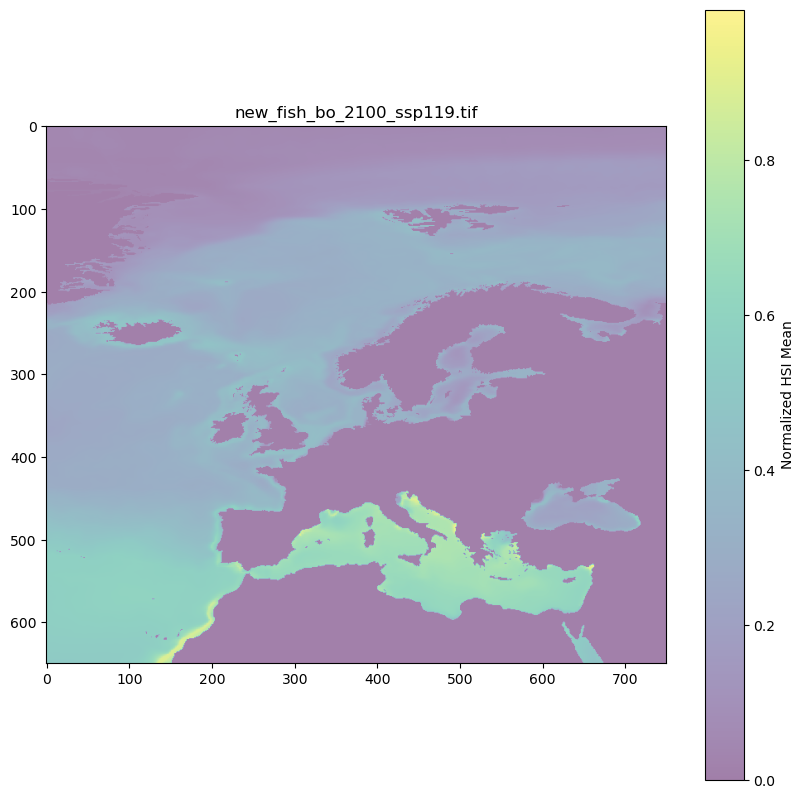

In [5]:
fishtifsSSP119 = ['tifs/new_fish_bo_baseline_bcubed.tif', 'tifs/new_fish_bo_2030_ssp119.tif', 'tifs/new_fish_bo_2100_ssp119.tif']

for tif in fishtifsSSP119:
    if tif.endswith('tif'):
        # Open the raster grid
        with rasterio.open(tif) as src:
            # Get the rasterized data
            data = src.read(1)
            
            # Plot the raster grid
            plt.figure(figsize=(10, 10))
            
            # Plot the rasterized values with transparency based on the values
            plt.imshow(data, cmap='viridis', alpha=0.5)
            plt.title(os.path.basename(tif))
            plt.colorbar(label='Normalized HSI Mean')

            # Display the plot
            plt.show()

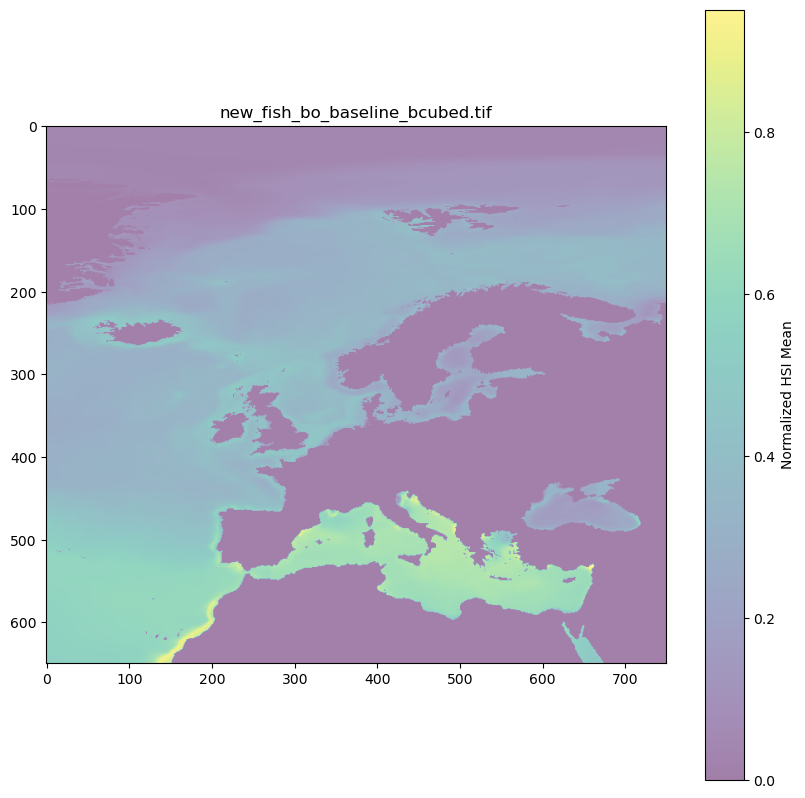

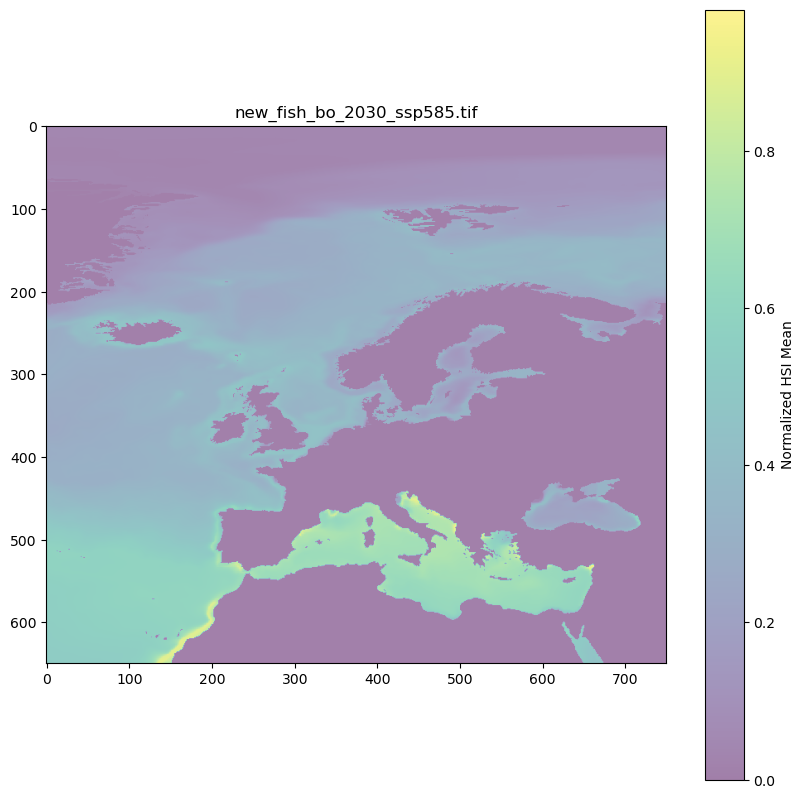

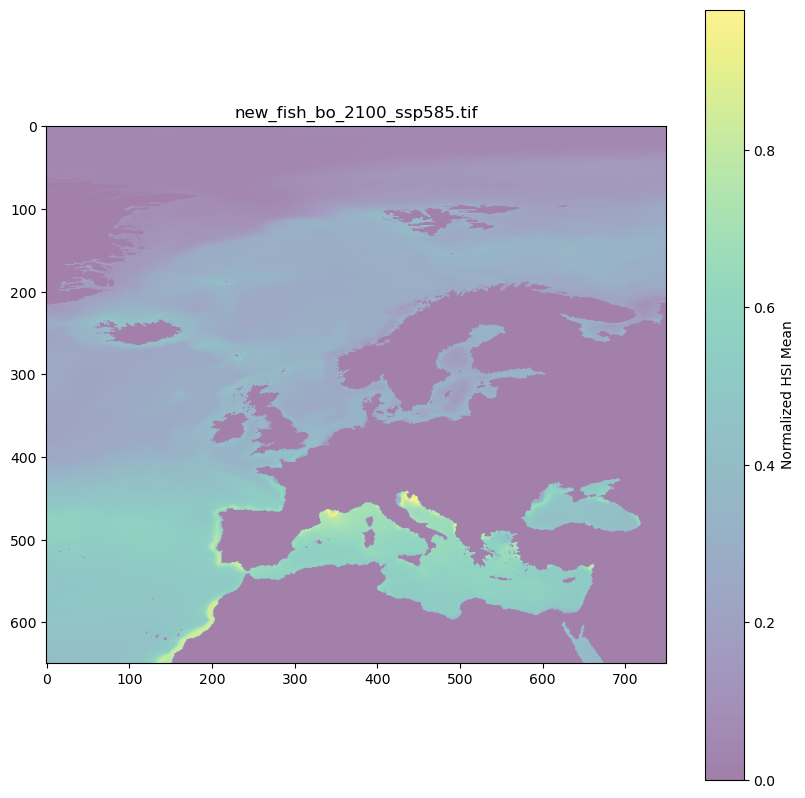

In [6]:
fishtifsSSP585 = ['tifs/new_fish_bo_baseline_bcubed.tif', 'tifs/new_fish_bo_2030_ssp585.tif', 'tifs/new_fish_bo_2100_ssp585.tif']

for tif in fishtifsSSP585:
    if tif.endswith('tif'):
        # Open the raster grid
        with rasterio.open(tif) as src:
            # Get the rasterized data
            data = src.read(1)
            
            # Plot the raster grid
            plt.figure(figsize=(10, 10))
            
            # Plot the rasterized values with transparency based on the values
            plt.imshow(data, cmap='viridis', alpha=0.5)
            plt.title(os.path.basename(tif))
            plt.colorbar(label='Normalized HSI Mean')

            # Display the plot
            plt.show()

In [7]:
# Define raster properties
xmin, ymin, xmax, ymax = gdf.total_bounds
res = 0.1  # Define the resolution of the raster
transform = from_origin(xmin, ymax, res, res)
width = int((xmax - xmin) / res)
height = int((ymax - ymin) / res)

In [8]:
# Calculate width and height based on the resolution
xmin, ymin, xmax, ymax = gdf.total_bounds
width = int(np.ceil((xmax - xmin) / res))
height = int(np.ceil((ymax - ymin) / res))

# Round up the width and height to ensure it's divisible by the resolution
width = int(np.ceil(width / res) * res)
height = int(np.ceil(height / res) * res)

# Create a raster grid
with rasterio.open(
        'raster_grid.tif',
        'w',
        driver='GTiff',
        height=height,
        width=width,
        count=1,
        dtype=rasterio.float64,
        crs='EPSG:4326',
        transform=transform
) as dst:
    # Rasterize points onto the grid
    point_mask = geometry_mask(gdf.geometry, out_shape=(height, width), transform=transform, invert=True)
    dst.write(point_mask.astype('float64'), 1)

    # Resample the rasterized points to match the grid
    with rasterio.open('raster_grid.tif') as src:
        data = src.read(1, out_shape=(height, width), resampling=Resampling.bilinear)

    # Write the resampled data to the file
    dst.write(data, 1)

In [9]:
gdf = gpd.read_file('data/derived_data/new_algae_bo_2100_ssp585.csv')

gdf

DriverError: data/derived_data/new_algae_bo_2100_ssp585.csv: No such file or directory

In [ ]:
gdf['hsi_mean'].plot()

TypeError: no numeric data to plot

In [ ]:
df = pd.read_csv('data/derived_data/new_algae_bo_2100_ssp585.csv')

# Create a GeoDataFrame with the longitude and latitude as geometry
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

gdf

,longitude,latitude,cellCode,time,chl_mean,so_mean,thetao_mean,no3_mean,hsi_mean,geometry
0,-29.975000,25.025000,-29.975_25.025,43830,0.009820,1.000000,1.0,0.000191,0.502503,POINT (-29.97500 25.02500)
1,-29.925000,25.025000,-29.925_25.025,43830,0.009814,1.000000,1.0,0.000174,0.502497,POINT (-29.92500 25.02500)
2,-29.875000,25.025000,-29.875_25.025,43830,0.009812,1.000000,1.0,0.000163,0.502494,POINT (-29.87500 25.02500)
3,-29.825000,25.025000,-29.825_25.025,43830,0.009815,1.000000,1.0,0.000156,0.502493,POINT (-29.82500 25.02500)
4,-29.775000,25.025000,-29.775_25.025,43830,0.009802,1.000000,1.0,0.000138,0.502485,POINT (-29.77500 25.02500)
...,...,...,...,...,...,...,...,...,...,...
1208618,44.775001,89.974998,44.775_89.975,43830,0.017726,0.361702,0.0,0.054856,0.108571,POINT (44.77500 89.97500)
1208619,44.825001,89.974998,44.825_89.975,43830,0.017727,0.361622,0.0,0.054854,0.108551,POINT (44.82500 89.97500)
1208620,44.875000,89.974998,44.875_89.975,43830,0.017729,0.361623,0.0,0.054862,0.108554,POINT (44.87500 89.97500)
1208621,44.924999,89.974998,44.925_89.975,43830,0.017732,0.361594,0.0,0.054889,0.108554,POINT (44.92500 89.97500)


In [ ]:
# Define raster properties
xmin, ymin, xmax, ymax = gdf.total_bounds
res = 0.1  # Define the resolution of the raster
transform = from_origin(xmin, ymax, res, res)
width = int((xmax - xmin) / res)
height = int((ymax - ymin) / res)


In [ ]:
# Calculate width and height based on the resolution
xmin, ymin, xmax, ymax = gdf.total_bounds
width = int(np.ceil((xmax - xmin) / res))
height = int(np.ceil((ymax - ymin) / res))

# Round up the width and height to ensure it's divisible by the resolution
width = int(np.ceil(width / res) * res)
height = int(np.ceil(height / res) * res)

# Create a raster grid
with rasterio.open(
        'raster_grid.tif',
        'w',
        driver='GTiff',
        height=height,
        width=width,
        count=1,
        dtype=rasterio.float64,
        crs='EPSG:4326',
        transform=transform
) as dst:
    # Use rasterio's reproject function to reproject the GeoDataFrame to the raster grid
    gdf_reproj = gdf.to_crs(dst.crs)
    # Sample the 'chl_mean' values onto the raster grid
    chl_raster = gdf_reproj['hsi_mean'].values.reshape(height, width)
    # Write the raster grid to the file
    dst.write(chl_raster, 1)

ValueError: cannot reshape array of size 1208623 into shape (650,750)

In [ ]:
# Calculate width and height based on the resolution
xmin, ymin, xmax, ymax = gdf.total_bounds
width = int(np.ceil((xmax - xmin) / res))
height = int(np.ceil((ymax - ymin) / res))

# Round up the width and height to ensure it's divisible by the resolution
width = int(np.ceil(width / res) * res)
height = int(np.ceil(height / res) * res)

# Create a raster grid
with rasterio.open(
        'raster_grid.tif',
        'w',
        driver='GTiff',
        height=height,
        width=width,
        count=1,
        dtype=rasterio.float64,
        crs='EPSG:4326',
        transform=transform
) as dst:
    # Rasterize points onto the grid
    point_mask = geometry_mask(gdf.geometry, out_shape=(height, width), transform=transform, invert=True)
    dst.write(point_mask.astype('float64'), 1)

    # Resample the rasterized points to match the grid
    with rasterio.open('raster_grid.tif') as src:
        data = src.read(1, out_shape=(height, width), resampling=Resampling.bilinear)

    # Write the resampled data to the file
    dst.write(data, 1)

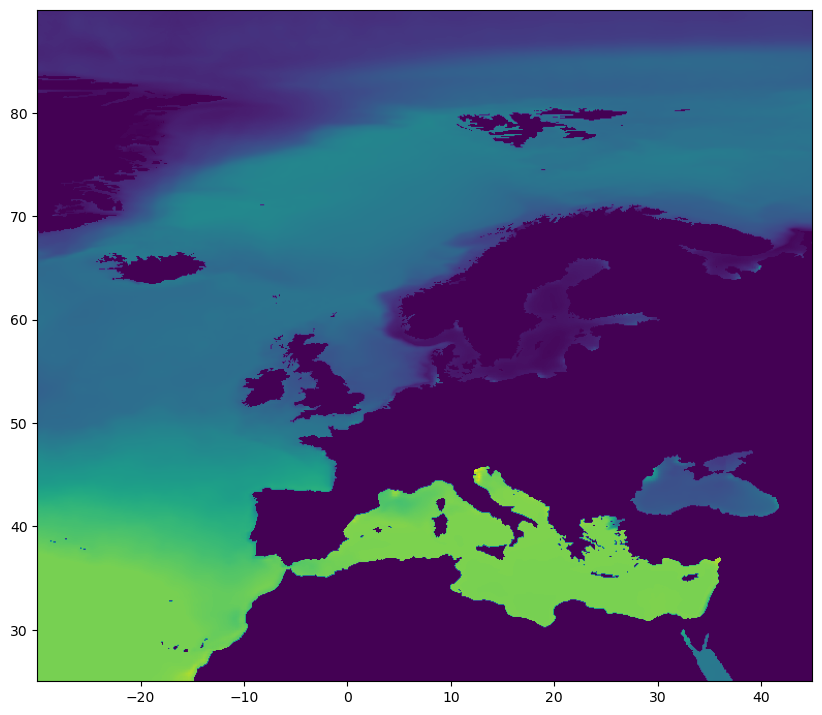

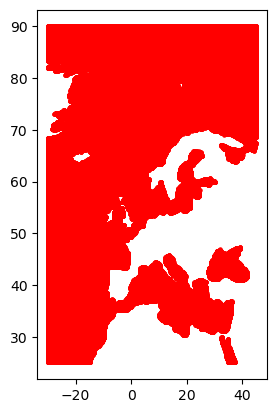

In [ ]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open the raster grid
with rasterio.open('raster_grid.tif') as src:
    # Plot the raster grid
    plt.figure(figsize=(10, 10))
    show(src, cmap='viridis')
    
    # Plot the original points on top
    gdf.plot(ax=plt.gca(), color='red', markersize=5)
    plt.show()

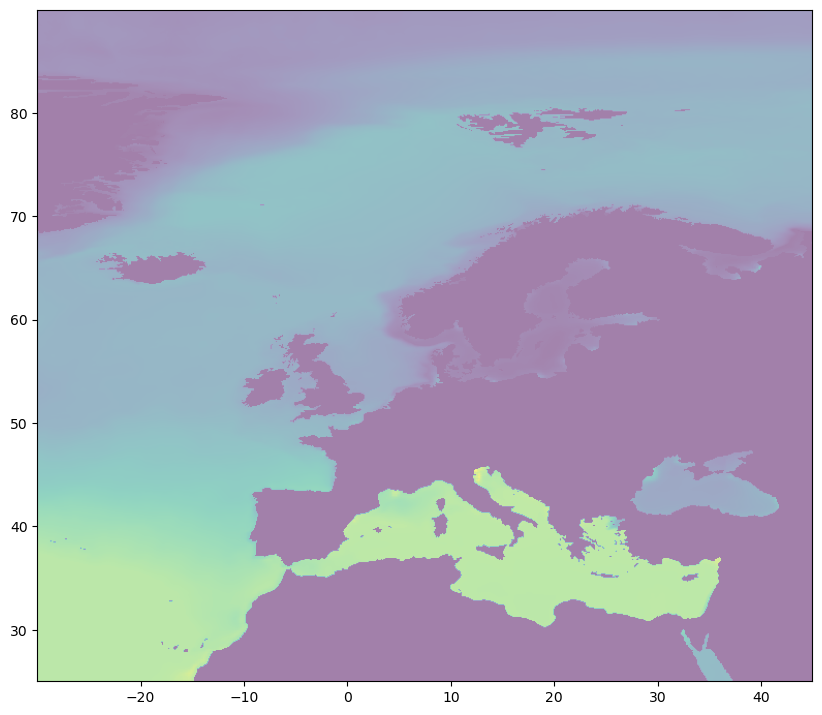

/home/samwork/miniforge3/envs/bcubed/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


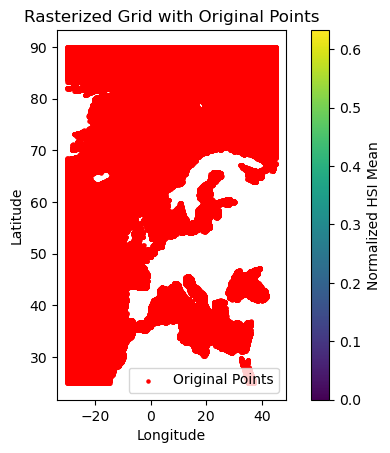

In [ ]:
# Open the raster grid
# Open the raster grid
with rasterio.open('raster_grid.tif') as src:
    # Get the rasterized data
    data = src.read(1)
    
    # Plot the raster grid
    plt.figure(figsize=(10, 10))
    
    # Plot the rasterized values with transparency based on the values
    show(src, cmap='viridis', alpha=0.5)  # Adjust alpha as needed for transparency
    
    # Plot the original points on top
    gdf.plot(ax=plt.gca(), color='red', markersize=5, label='Original Points')
    
    # Set plot title and labels
    plt.title('Rasterized Grid with Original Points')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Create a colorbar legend based on the values
    norm = plt.Normalize(vmin=np.min(data), vmax=np.max(data))
    sm = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('Normalized HSI Mean')

    # Display the plot
    plt.legend()
    plt.show()